# College Admissions Data Analysis (2018-2025)

This notebook analyzes admissions data for incoming freshmen from 2018-19 to 2024-25 across various demographic categories. The data includes applications, offers, enrollment, acceptance rates, and yield rates.

**Key Questions:**
1. How have admissions trends changed over time?
2. What impact did COVID-19 have on different demographic groups?
3. Are there disparities in acceptance and yield rates between demographic groups?
4. How can we optimize enrollment yield for underrepresented groups?
5. What are the future projections for admissions metrics?

The analysis leverages custom utility functions defined in `admission_utils.py`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

import utils as au

plt.style.use('ggplot')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100

DATA_DIR = 'data/'

## 1. Data Loading and Exploration

First, we'll load all the CSV files and organize them by demographic categories. The data is structured as follows:

- **Race/Ethnicity**: asian.csv, black.csv, hispanic.csv, white.csv
- **Residency**: in_state.csv, out_of_state.csv, international.csv, national.csv
- **Generation**: first_gen.csv, non_first_gen.csv
- **Gender**: male.csv, female.csv
- **Overall**: all.csv

In [2]:
data = au.load_all_data(DATA_DIR)
print(f"Data loaded successfully with {len(data)} demographic categories.")

for category, groups in data.items():
    print(f"\n{category.replace('_', ' ').title()} categories:")
    for group in groups.keys():
        print(f"  - {group.replace('_', ' ').title()}")

Data loaded successfully with 5 demographic categories.

Race Ethnicity categories:
  - Asian
  - Black
  - Hispanic
  - White

Residence categories:
  - International
  - In State
  - National
  - Out Of State

Generation categories:
  - First Gen
  - Non First Gen

Gender categories:
  - Female
  - Male

Overall categories:
  - All


In [3]:
print("Sample data structure (overall admissions):")
display(data['overall']['all'])

Sample data structure (overall admissions):


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
Admissions,,,,,,,
Applied,31845.0,31911,30710.0,41995.0,45238.0,47140.0,52434.0
Offered,20627.0,22334,20183.0,23691.0,25752.0,26857.0,28697.0
Enrolled,6214.0,7604,6569.0,6718.0,7101.0,7141.0,7244.0
Offered Rate,64.8,70,65.7,56.4,56.9,57.0,54.7
Yield,30.1,34,32.5,28.4,27.6,26.6,25.2


In [4]:
summary = au.prepare_data_summary(data)

display(HTML(summary.to_html(index=False, float_format=lambda x: f'{x:.1f}' if pd.notna(x) else '')))

Category,Group,Applications (Latest),Offers (Latest),Enrolled (Latest),Acceptance Rate (%),Yield Rate (%),Application Growth (%),Enrollment Growth (%)
Race Ethnicity,Asian,8618,4523,1131,52.5,25.0,127.1,79.5
Race Ethnicity,Black,4317,1501,338,34.8,22.5,142.9,12.7
Race Ethnicity,Hispanic,5005,2253,528,45.0,23.4,100.4,18.4
Race Ethnicity,White,24091,14211,4036,59.0,28.4,29.2,2.7
Residence,International,5028,3343,437,66.5,13.1,91.2,4.3
Residence,In State,19641,9331,4481,47.5,48.0,24.8,5.0
Residence,National,47406,25354,6807,53.5,26.8,62.3,17.5
Residence,Out Of State,32793,19366,2763,59.1,14.3,103.6,42.0
Generation,First Gen,9008,3908,939,43.4,24.0,92.7,-2.7
Generation,Non First Gen,43426,24789,6305,57.1,25.4,59.8,20.1


## 2. Overall Admissions Trends

Let's examine the overall trends in applications, offers, and enrollments from 2018-19 to 2024-25.

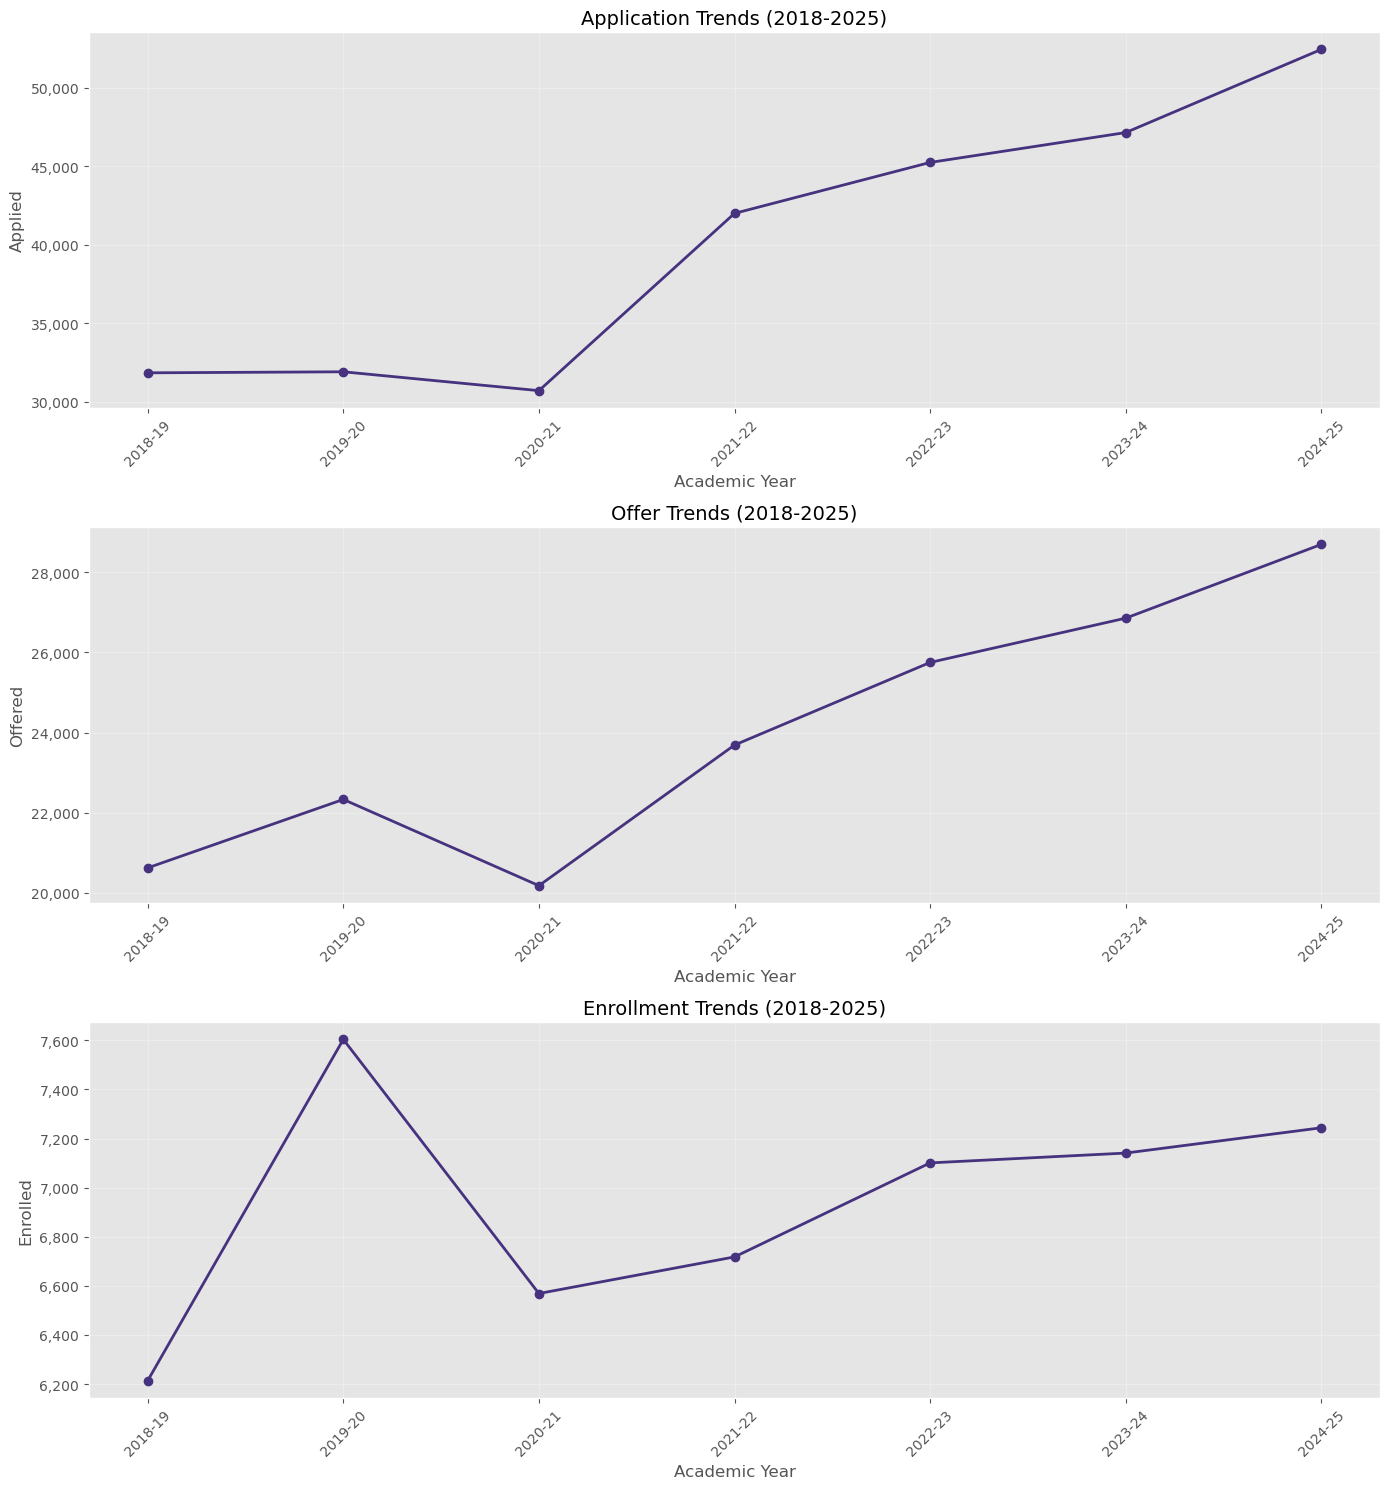

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

metrics = ['Applied', 'Offered', 'Enrolled']
titles = ['Application Trends (2018-2025)', 'Offer Trends (2018-2025)', 'Enrollment Trends (2018-2025)']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    au.plot_time_series(data['overall']['all'], metric, title, ax=axes[i])

plt.tight_layout()
plt.show()

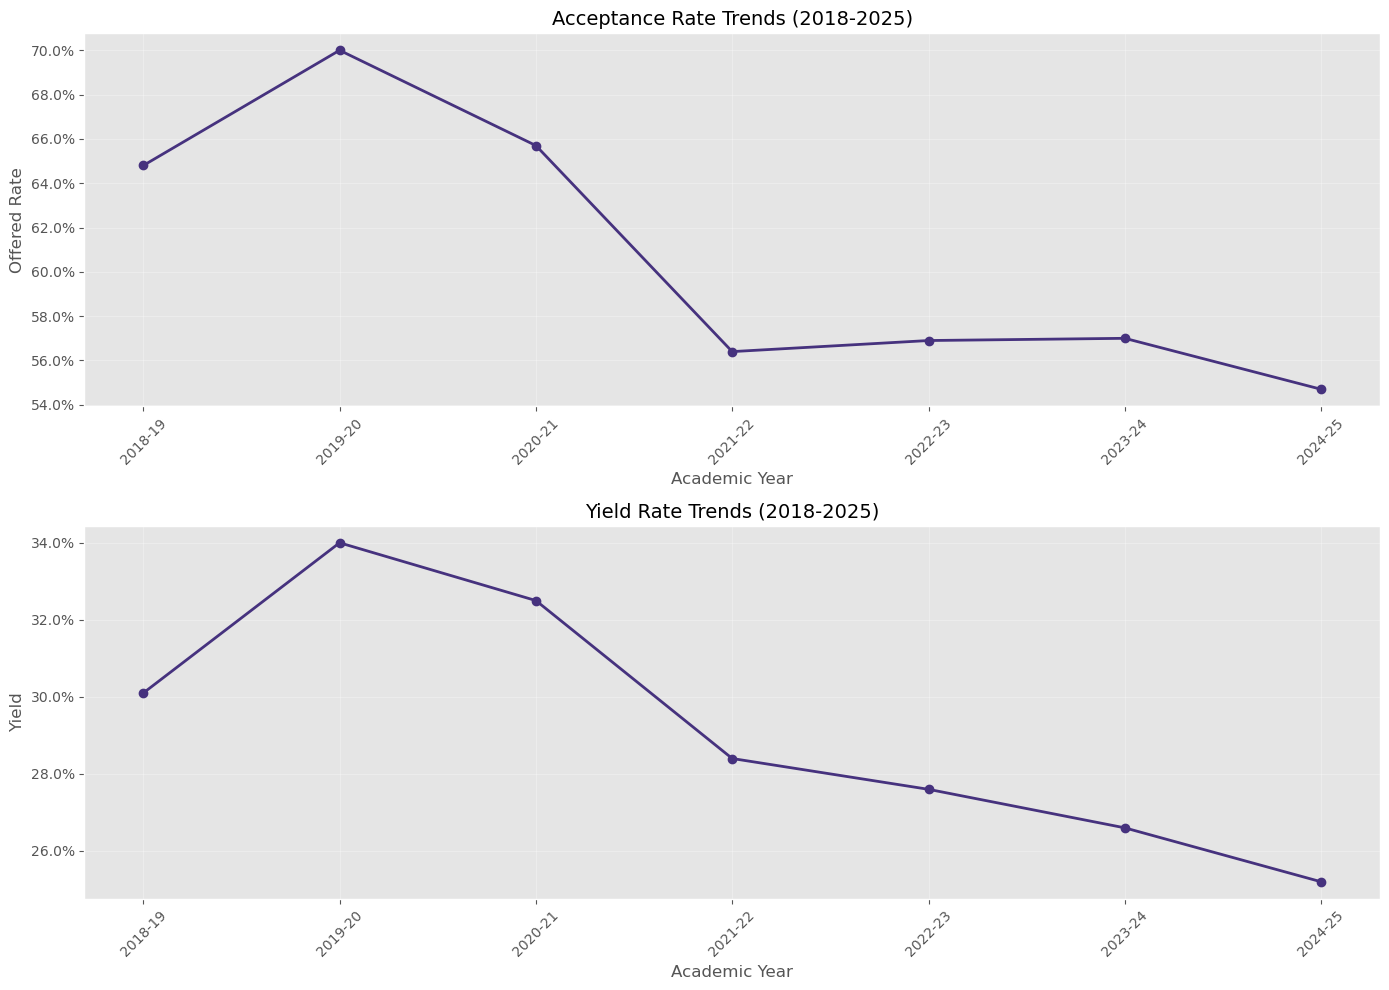

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

metrics = ['Offered Rate', 'Yield']
titles = ['Acceptance Rate Trends (2018-2025)', 'Yield Rate Trends (2018-2025)']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    au.plot_time_series(data['overall']['all'], metric, title, ax=axes[i])

plt.tight_layout()
plt.show()

,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
Admissions,,,,,,,
Applied,NaN,0.2%,-3.8%,36.7%,7.7%,4.2%,11.2%
Offered,NaN,8.3%,-9.6%,17.4%,8.7%,4.3%,6.9%
Enrolled,NaN,22.4%,-13.6%,2.3%,5.7%,0.6%,1.4%
Offered Rate,NaN,8.0%,-6.1%,-14.2%,0.9%,0.2%,-4.0%
Yield,NaN,13.0%,-4.4%,-12.6%,-2.8%,-3.6%,-5.3%


<Figure size 1400x800 with 0 Axes>

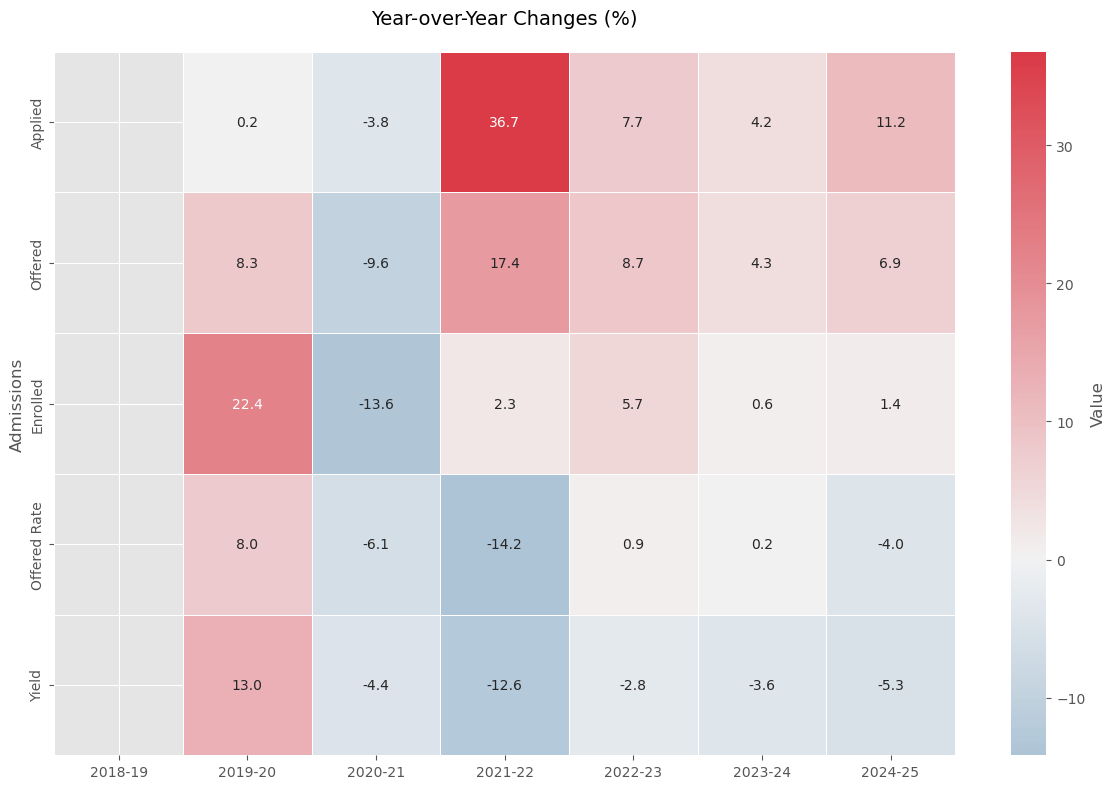

In [7]:
yoy_changes = au.calculate_year_over_year_change(data['overall']['all'])

display(HTML(yoy_changes.to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

plt.figure(figsize=(14, 8))
au.plot_heatmap(yoy_changes, "Year-over-Year Changes (%)")
plt.show()

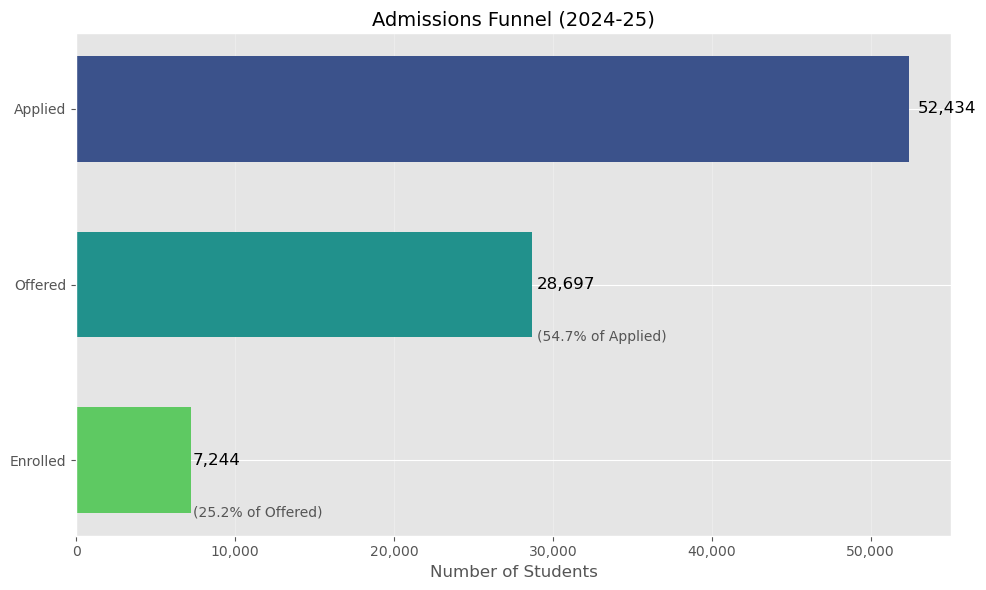

In [8]:
au.plot_admissions_funnel(data['overall']['all'], year='2024-25')
plt.show()

## 3. Demographic Comparison Analysis

Now, let's compare admissions metrics across different demographic groups.

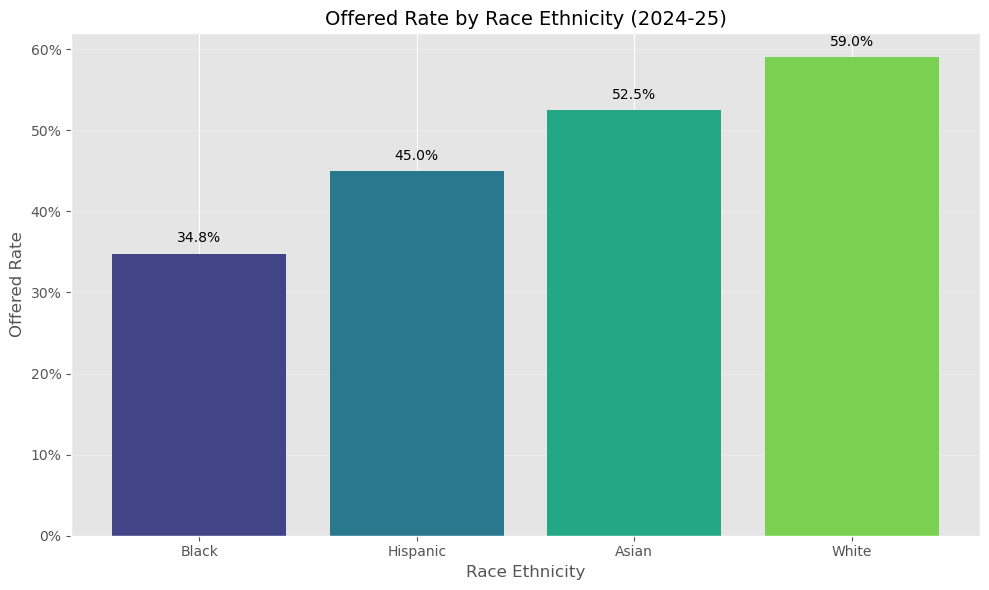

In [9]:
au.plot_demographic_comparison(data, 'race_ethnicity', 'Offered Rate', '2024-25')
plt.show()

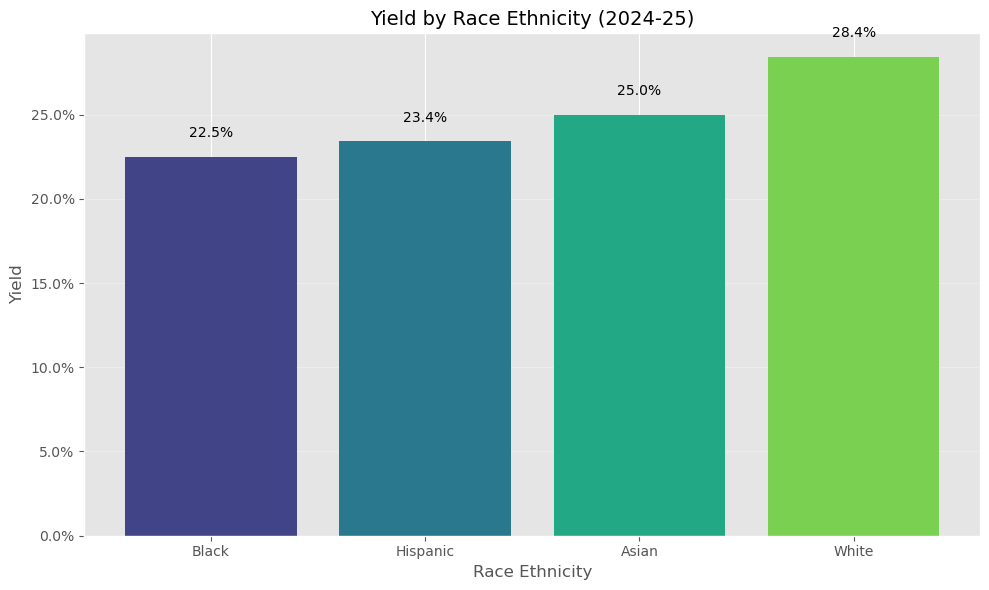

In [10]:
au.plot_demographic_comparison(data, 'race_ethnicity', 'Yield', '2024-25')
plt.show()

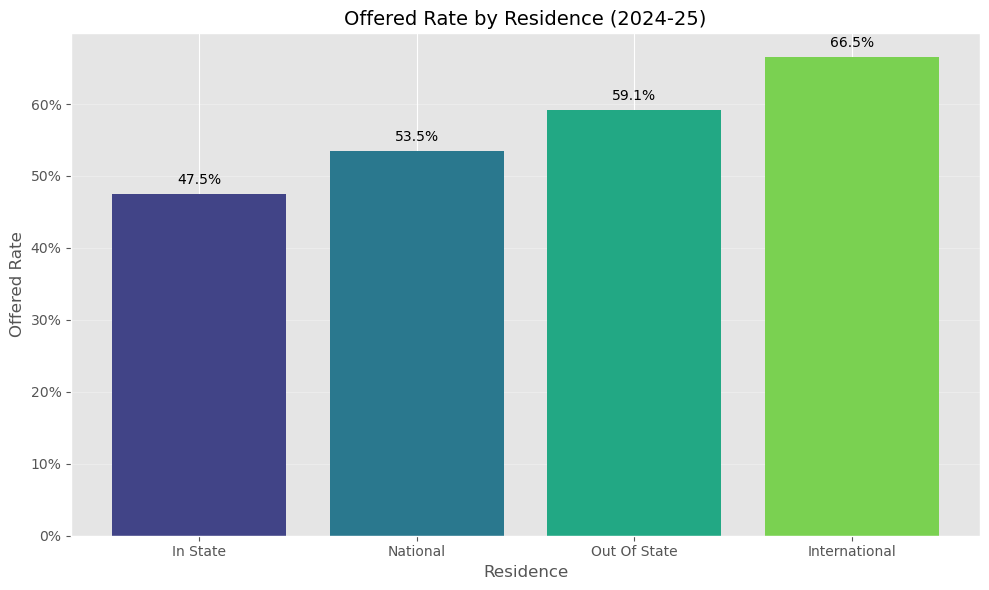

In [11]:
au.plot_demographic_comparison(data, 'residence', 'Offered Rate', '2024-25')
plt.show()

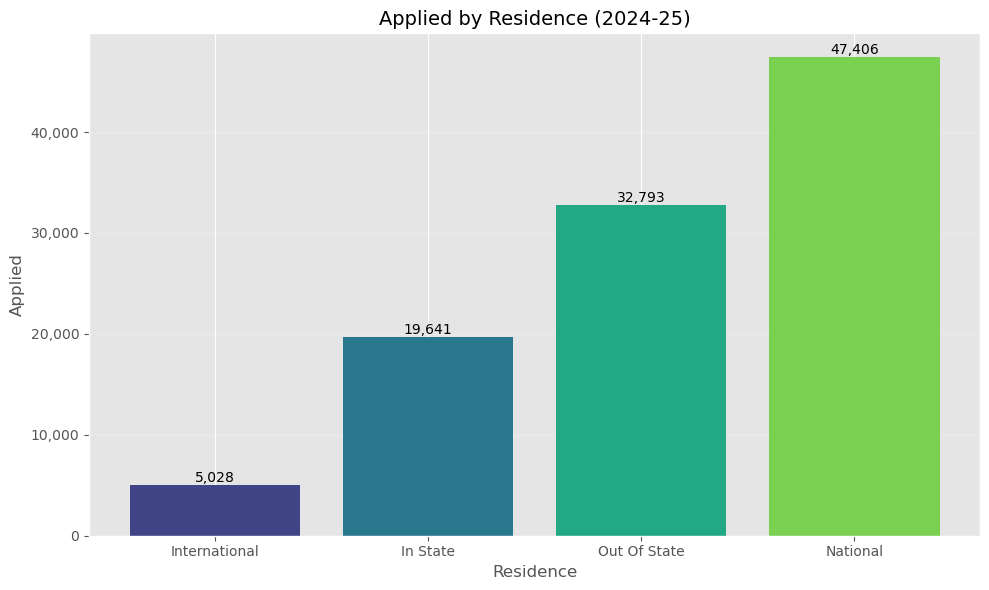

In [12]:
au.plot_demographic_comparison(data, 'residence', 'Applied', '2024-25')
plt.show()

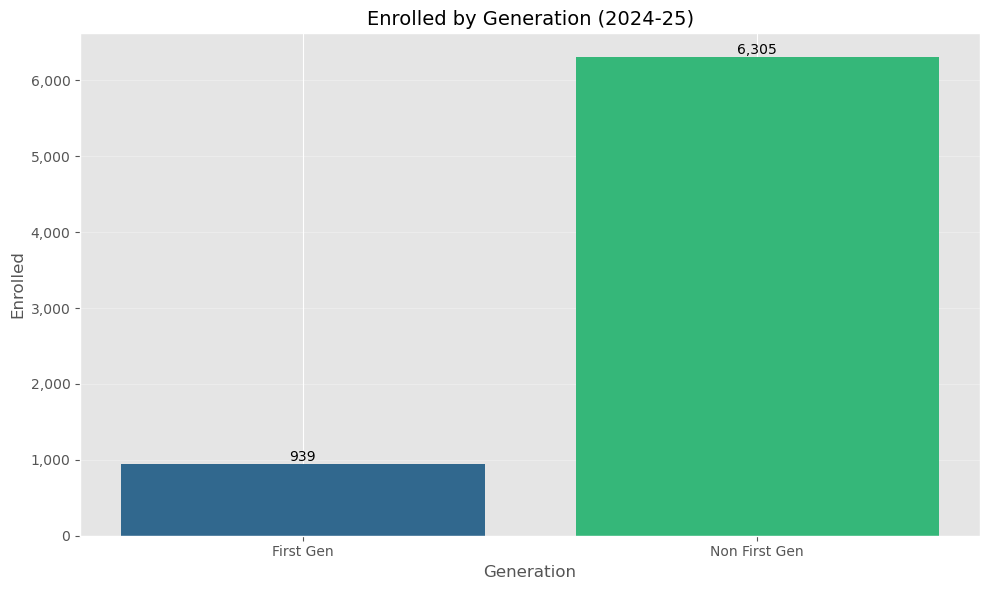

In [13]:
au.plot_demographic_comparison(data, 'generation', 'Enrolled', '2024-25')
plt.show()

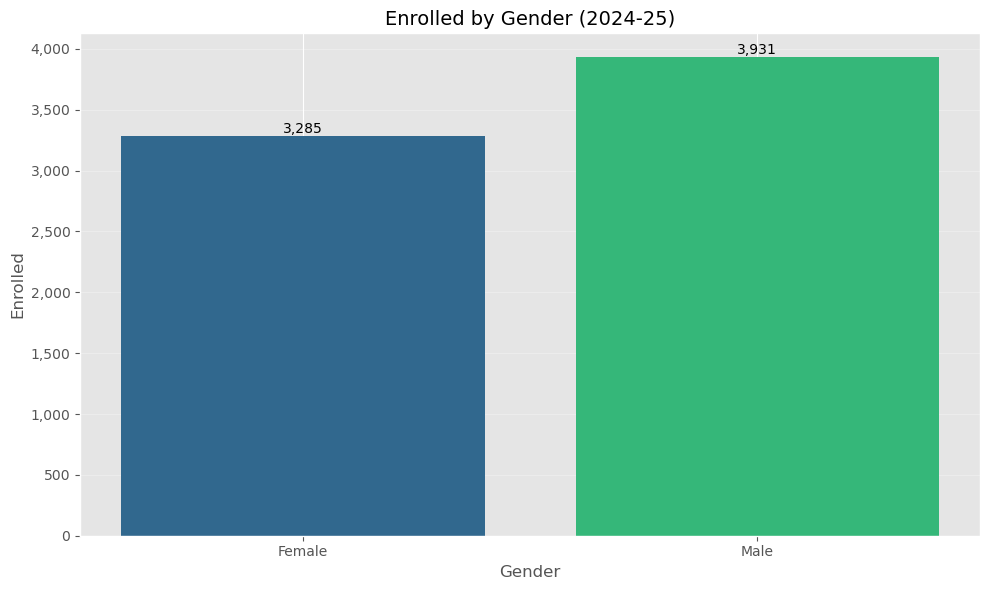

In [14]:
au.plot_demographic_comparison(data, 'gender', 'Enrolled', '2024-25')
plt.show()

## 4. Trends by Demographic Group

Let's examine how trends have evolved over time for different demographic groups.

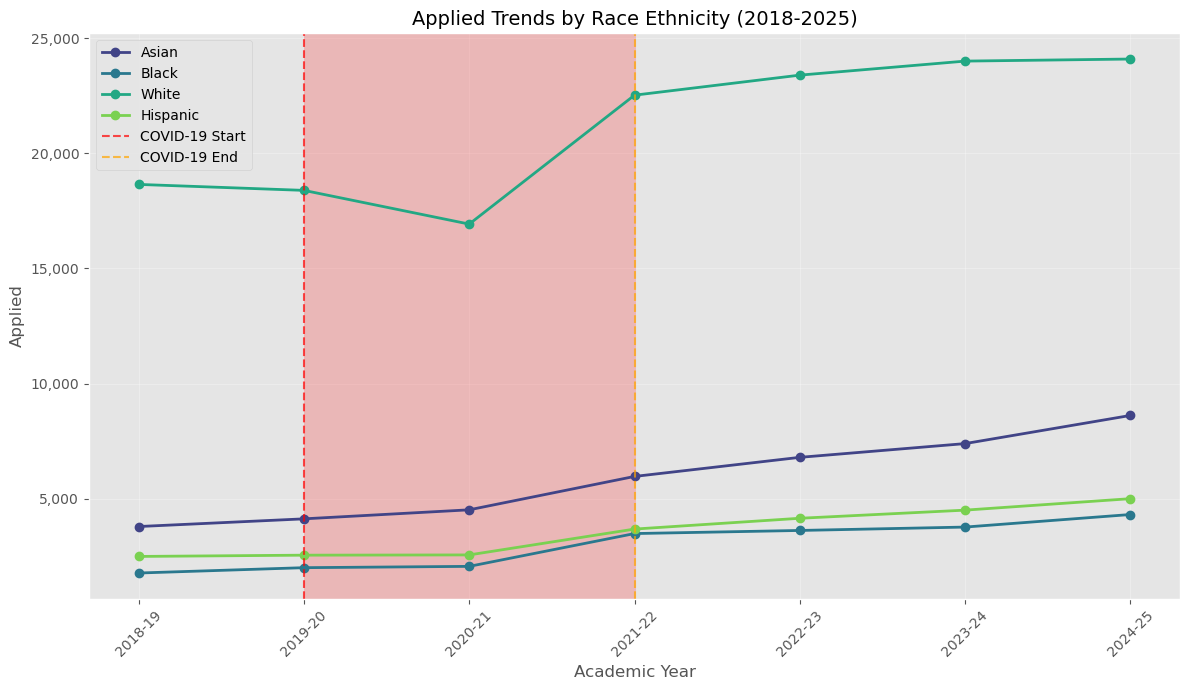

In [15]:
au.plot_time_series_by_group(data, 'race_ethnicity', 'Applied')
plt.show()

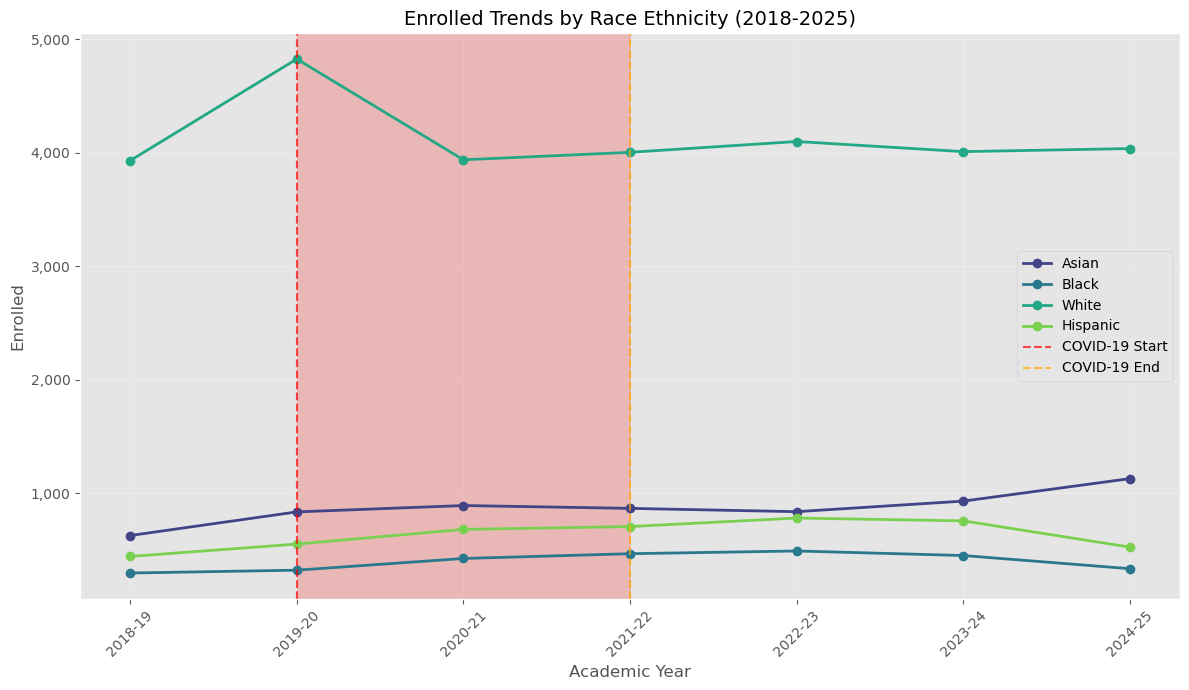

In [16]:
au.plot_time_series_by_group(data, 'race_ethnicity', 'Enrolled')
plt.show()

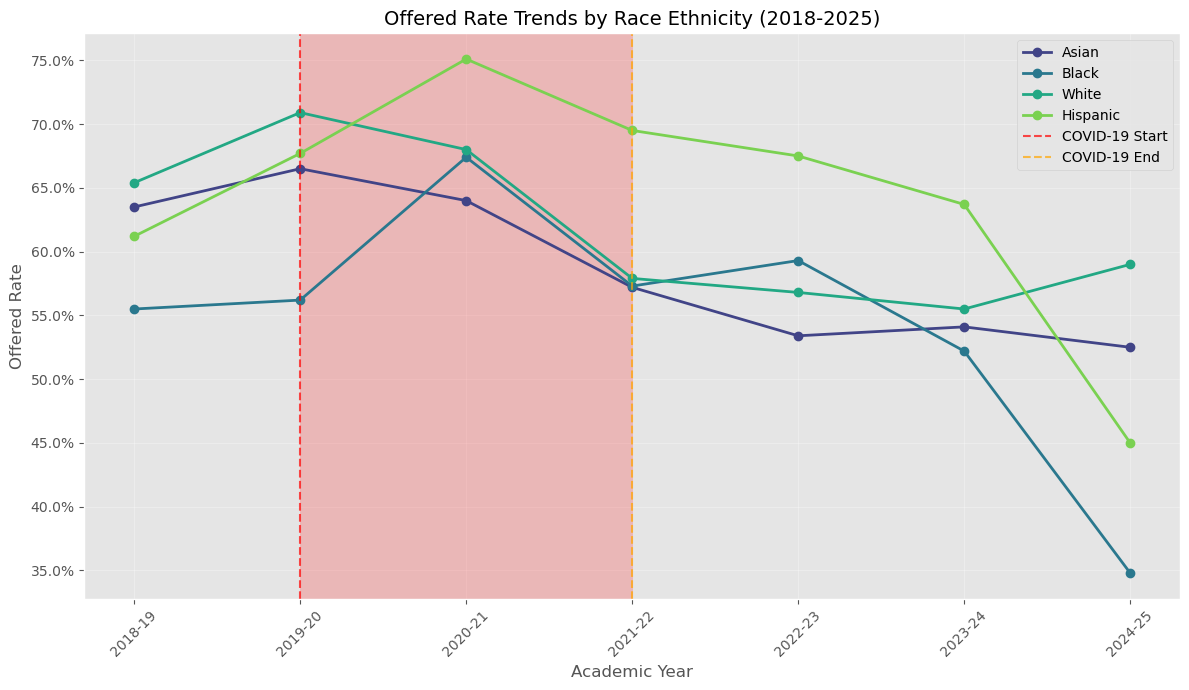

In [17]:
au.plot_time_series_by_group(data, 'race_ethnicity', 'Offered Rate')
plt.show()

c:\Users\Eric\Desktop\Portfolio\vt-covid-analytics\admission_utils.py:563: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_for_plot = data_for_plot.fillna(0)


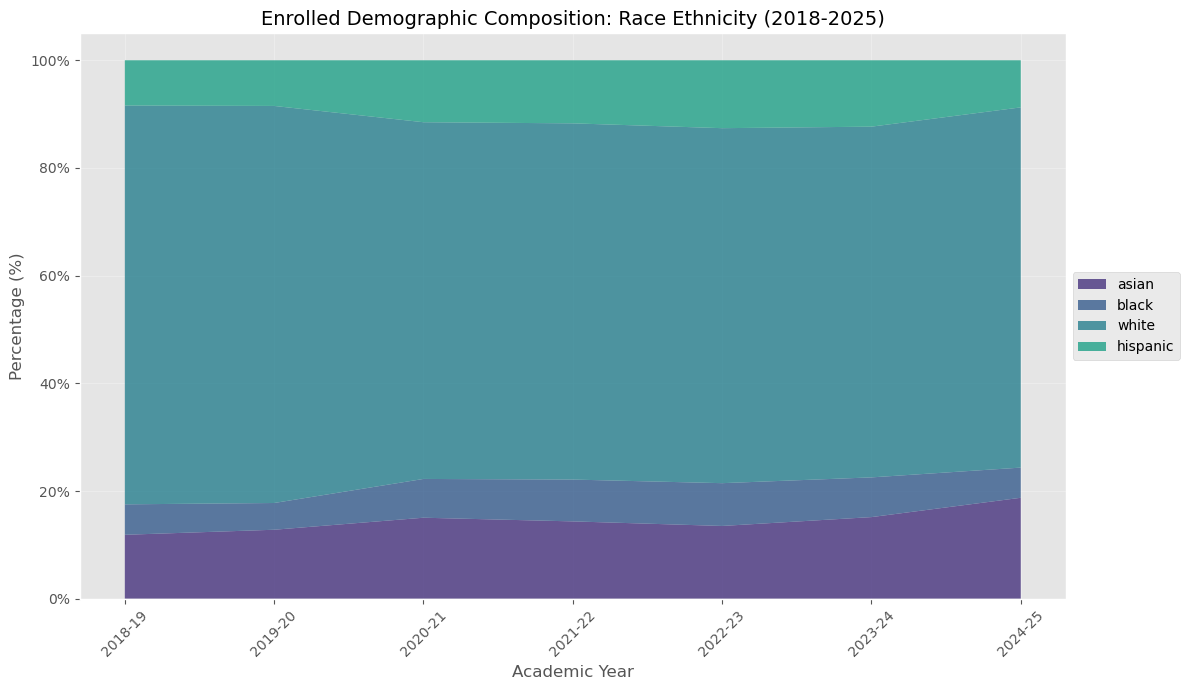

In [18]:
demographic_ratios = au.calculate_demographic_ratios(data)

au.plot_stacked_area(demographic_ratios, 'race_ethnicity', 'Enrolled')
plt.show()

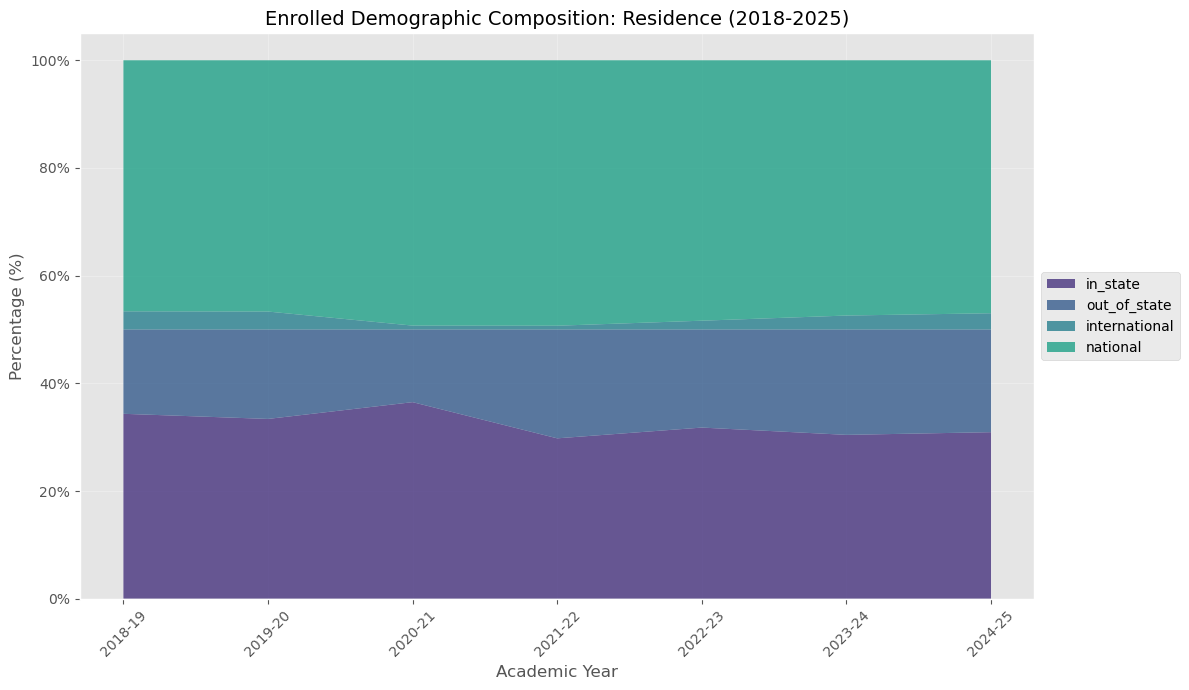

In [19]:
au.plot_stacked_area(demographic_ratios, 'residence', 'Enrolled')
plt.show()

In [20]:
acceptance_rates = au.compare_acceptance_rates(data)

print("Acceptance Rates by Race/Ethnicity:")
display(HTML(acceptance_rates['race_ethnicity'].to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

print("\nAcceptance Rates by Residence:")
display(HTML(acceptance_rates['residence'].to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

print("\nAcceptance Rates by Generation Status:")
display(HTML(acceptance_rates['generation'].to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

Acceptance Rates by Race/Ethnicity:


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
asian,63.5%,66.5%,64.0%,57.2%,53.4%,54.1%,52.5%
black,55.5%,56.2%,67.4%,57.3%,59.3%,52.2%,34.8%
white,65.4%,70.9%,68.0%,57.9%,56.8%,55.5%,59.0%
hispanic,61.2%,67.7%,75.1%,69.5%,67.5%,63.7%,45.0%



Acceptance Rates by Residence:


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
in_state,60.0%,63.8%,62.2%,43.9%,49.3%,47.0%,47.5%
out_of_state,69.5%,75.8%,69.2%,66.7%,62.5%,63.7%,59.1%
international,74.7%,90.5%,40.1%,20.1%,48.6%,68.0%,66.5%
national,63.9%,68.5%,67.6%,58.9%,57.6%,56.1%,53.5%



Acceptance Rates by Generation Status:


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
first_gen,59.5%,62.1%,67.7%,60.1%,59.6%,56.4%,43.4%
non_first_gen,65.7%,71.6%,65.4%,55.7%,56.3%,57.1%,57.1%


## 5. COVID-19 Impact Analysis

Let's analyze how the COVID-19 pandemic affected admissions patterns across different demographic groups. We'll compare three periods:
- Pre-COVID: 2018-19, 2019-20
- During COVID: 2020-21, 2021-22
- Post-COVID: 2022-23, 2023-24, 2024-25

In [21]:
covid_impact = au.analyze_covid_impact(data)

print("COVID-19 Impact on Applications:")
display(HTML(covid_impact['Applied'].to_html(float_format=lambda x: f'{x:.1f}' if pd.notna(x) else '')))

print("\nCOVID-19 Impact on Enrollment:")
display(HTML(covid_impact['Enrolled'].to_html(float_format=lambda x: f'{x:.1f}' if pd.notna(x) else '')))

COVID-19 Impact on Applications:


,Pre-COVID,During-COVID,Post-COVID,During vs Pre (%),Post vs During (%),Post vs Pre (%)
race_ethnicity,6724.5,7717.8,9973.1,14.8,29.2,48.3
residence,15939.0,18176.2,24135.3,14.0,32.8,51.4
generation,15939.0,18176.2,24135.3,14.0,32.8,51.4
gender,15906.2,18156.5,24065.8,14.1,32.5,51.3
overall,31878.0,36352.5,48270.7,14.0,32.8,51.4



COVID-19 Impact on Enrollment:


,Pre-COVID,During-COVID,Post-COVID,During vs Pre (%),Post vs During (%),Post vs Pre (%)
race_ethnicity,1481.0,1499.2,1533.7,1.2,2.3,3.6
residence,3454.5,3321.8,3581.0,-3.8,7.8,3.7
generation,3454.5,3321.8,3581.0,-3.8,7.8,3.7
gender,3446.5,3317.0,3571.5,-3.8,7.7,3.6
overall,6909.0,6643.5,7162.0,-3.8,7.8,3.7


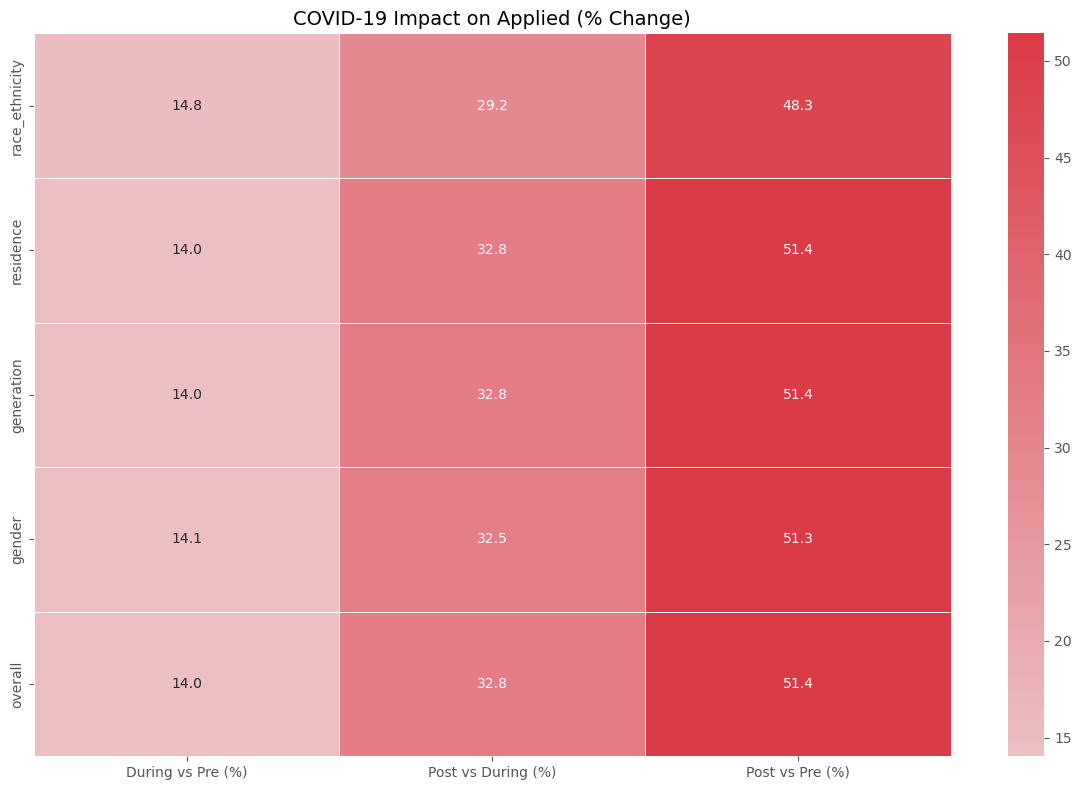

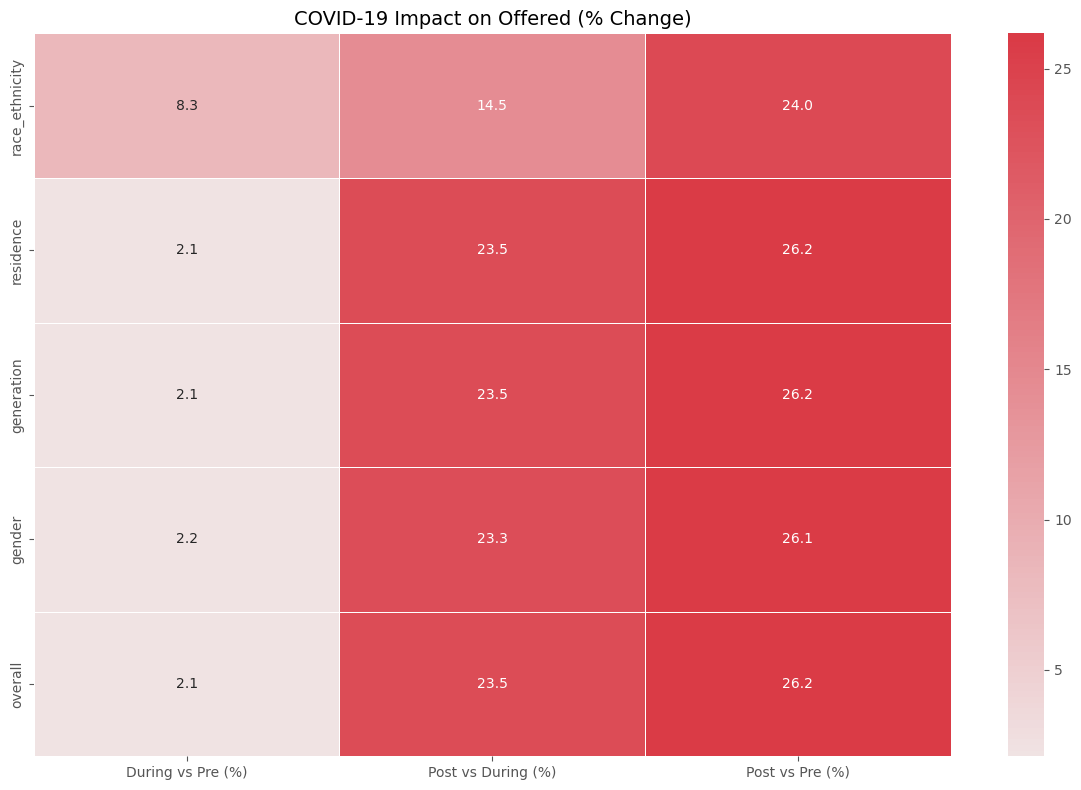

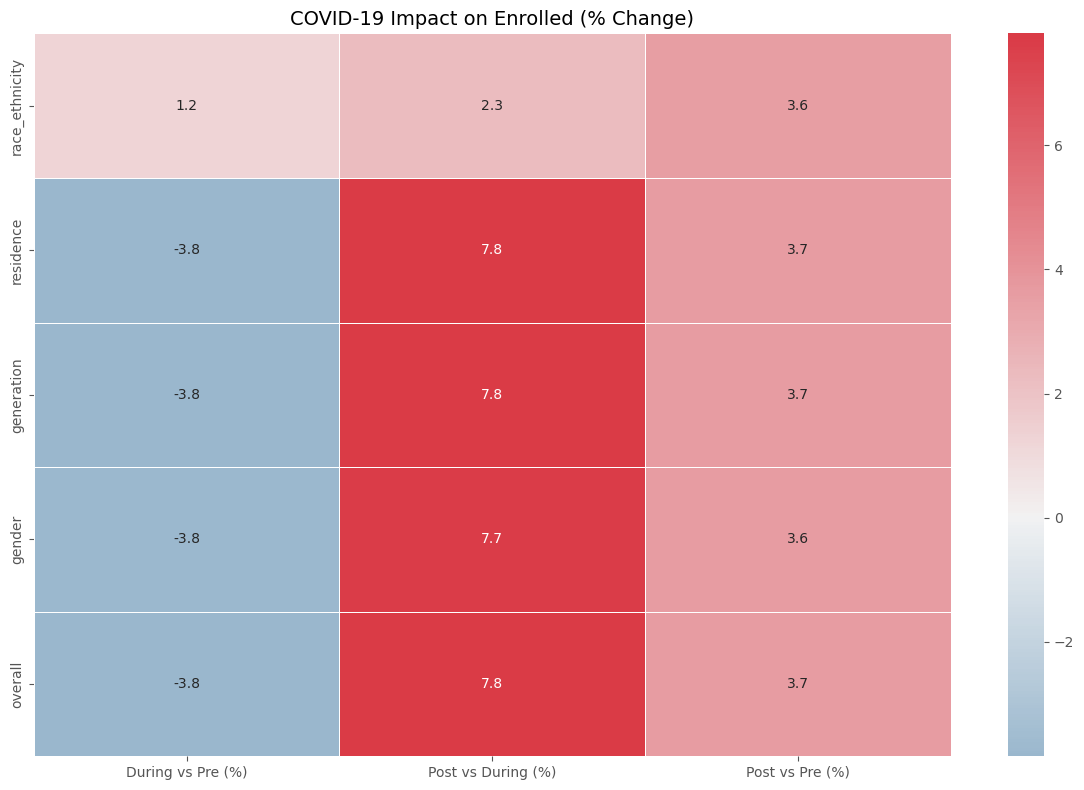

In [22]:
au.plot_covid_impact(covid_impact, 'Applied')
plt.show()

au.plot_covid_impact(covid_impact, 'Offered')
plt.show()

au.plot_covid_impact(covid_impact, 'Enrolled')
plt.show()

In [23]:
covid_detailed = au.analyze_covid_impact_detailed(data)

race_rows = [row for row in covid_detailed['Enrolled'].index if 'Race Ethnicity' in row]
print("Detailed COVID-19 Impact on Enrollment by Race/Ethnicity:")
display(HTML(covid_detailed['Enrolled'].loc[race_rows].to_html(float_format=lambda x: f'{x:.1f}' if pd.notna(x) else '')))

Detailed COVID-19 Impact on Enrollment by Race/Ethnicity:


## 6. Yield Optimization Analysis

Let's analyze yield rates (the percentage of admitted students who enroll) across different demographic groups and identify opportunities for optimization.

In [24]:
yield_rates = au.compare_yield_rates(data)

print("Yield Rates by Race/Ethnicity:")
display(HTML(yield_rates['race_ethnicity'].to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

print("\nYield Rates by Residence:")
display(HTML(yield_rates['residence'].to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

Yield Rates by Race/Ethnicity:


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
asian,26.2%,30.5%,30.9%,25.4%,23.2%,23.3%,25.0%
black,30.4%,28.8%,30.7%,23.5%,23.0%,23.1%,22.5%
white,32.2%,37.0%,34.2%,30.7%,30.9%,30.1%,28.4%
hispanic,29.2%,32.1%,35.6%,27.7%,28.0%,26.4%,23.4%



Yield Rates by Residence:


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25
in_state,45.2%,51.3%,50.3%,48.4%,48.1%,48.5%,48.0%
out_of_state,17.4%,20.3%,16.6%,17.6%,15.8%,15.6%,14.3%
international,21.3%,25.5%,11.1%,17.7%,14.7%,15.5%,13.1%
national,31.1%,34.9%,33.5%,28.6%,28.4%,27.7%,26.8%


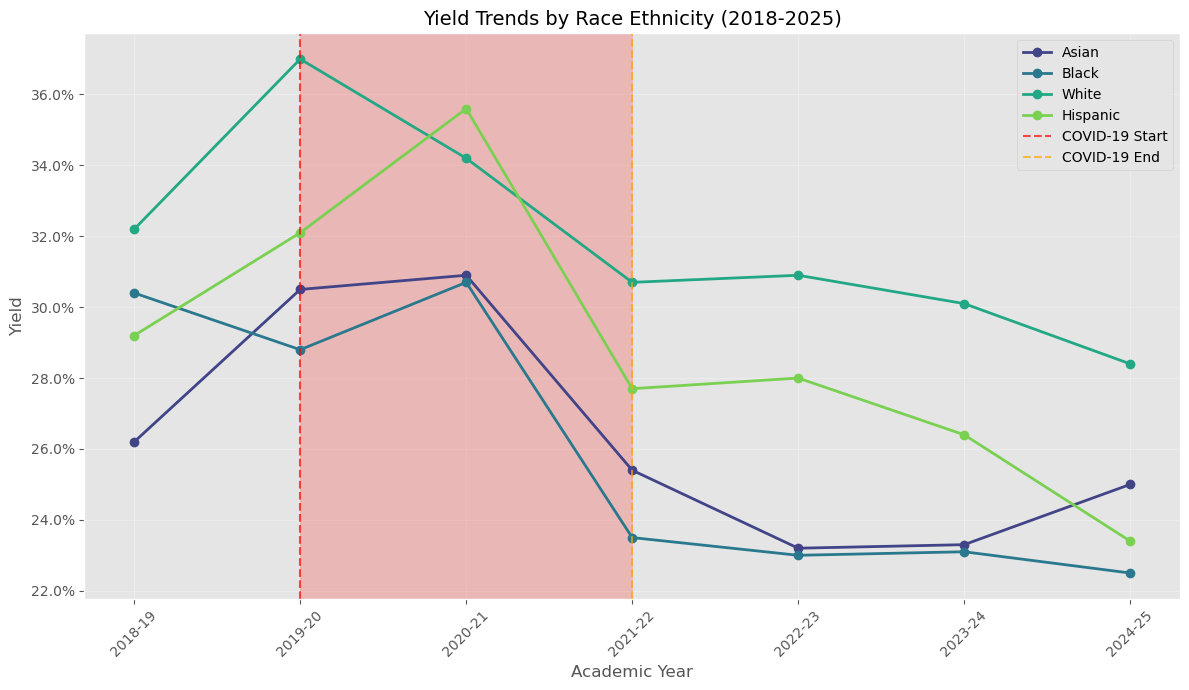

In [25]:
au.plot_time_series_by_group(data, 'race_ethnicity', 'Yield')
plt.show()

In [26]:
yield_optimization = au.analyze_enrollment_yield_optimization(data)

print("Yield Optimization Opportunities:")
display(HTML(yield_optimization.to_html(index=False, float_format=lambda x: f'{x:.1f}' if pd.notna(x) else '')))

Yield Optimization Opportunities:


Category,Group,Current Yield (%),Target Yield (%),Gap (%),Current Offers,Current Enrolled,Potential Additional Enrollments,Strategy Priority
Residence,Out Of State,14.3,25.2,10.9,19366.0,2763.0,2110,High
Residence,International,13.1,25.2,12.1,3343.0,437.0,404,High
Generation,First Gen,24.0,25.2,1.2,3908.0,939.0,46,Low
Race Ethnicity,Black,22.5,25.2,2.7,1501.0,338.0,40,Medium
Race Ethnicity,Hispanic,23.4,25.2,1.8,2253.0,528.0,40,Low
Gender,Female,25.1,25.2,0.1,13091.0,3285.0,13,Low
Race Ethnicity,Asian,25.0,25.2,0.2,4523.0,1131.0,9,Low
Gender,Male,25.4,25.2,-0.2,15484.0,3931.0,-30,Low
Generation,Non First Gen,25.4,25.2,-0.2,24789.0,6305.0,-49,Low
Residence,National,26.8,25.2,-1.6,25354.0,6807.0,-405,Low


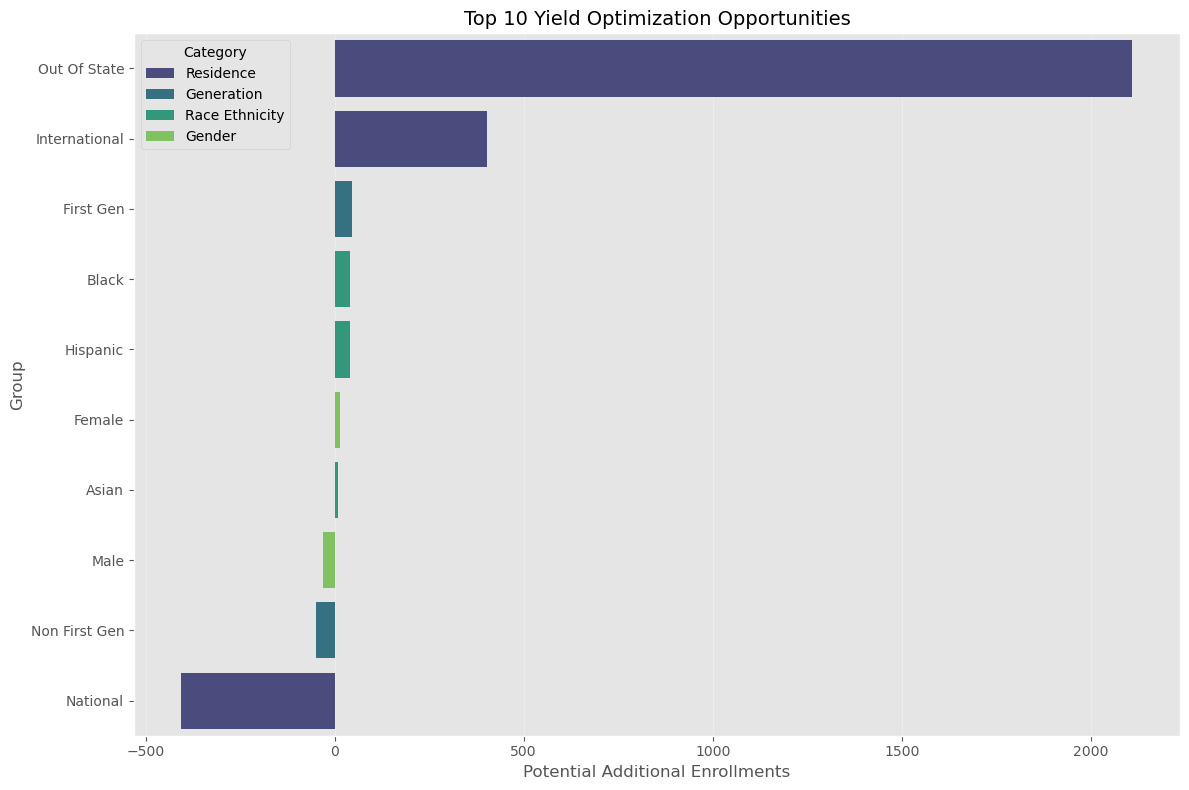

In [27]:
plt.figure(figsize=(12, 8))
top_groups = yield_optimization.head(10)  
sns.barplot(x='Potential Additional Enrollments', y='Group', data=top_groups, 
            palette='viridis', hue='Category')
plt.title('Top 10 Yield Optimization Opportunities', fontsize=14)
plt.xlabel('Potential Additional Enrollments', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Geographic Diversity Analysis

Let's analyze trends in geographic diversity, comparing in-state, out-of-state, and international students.

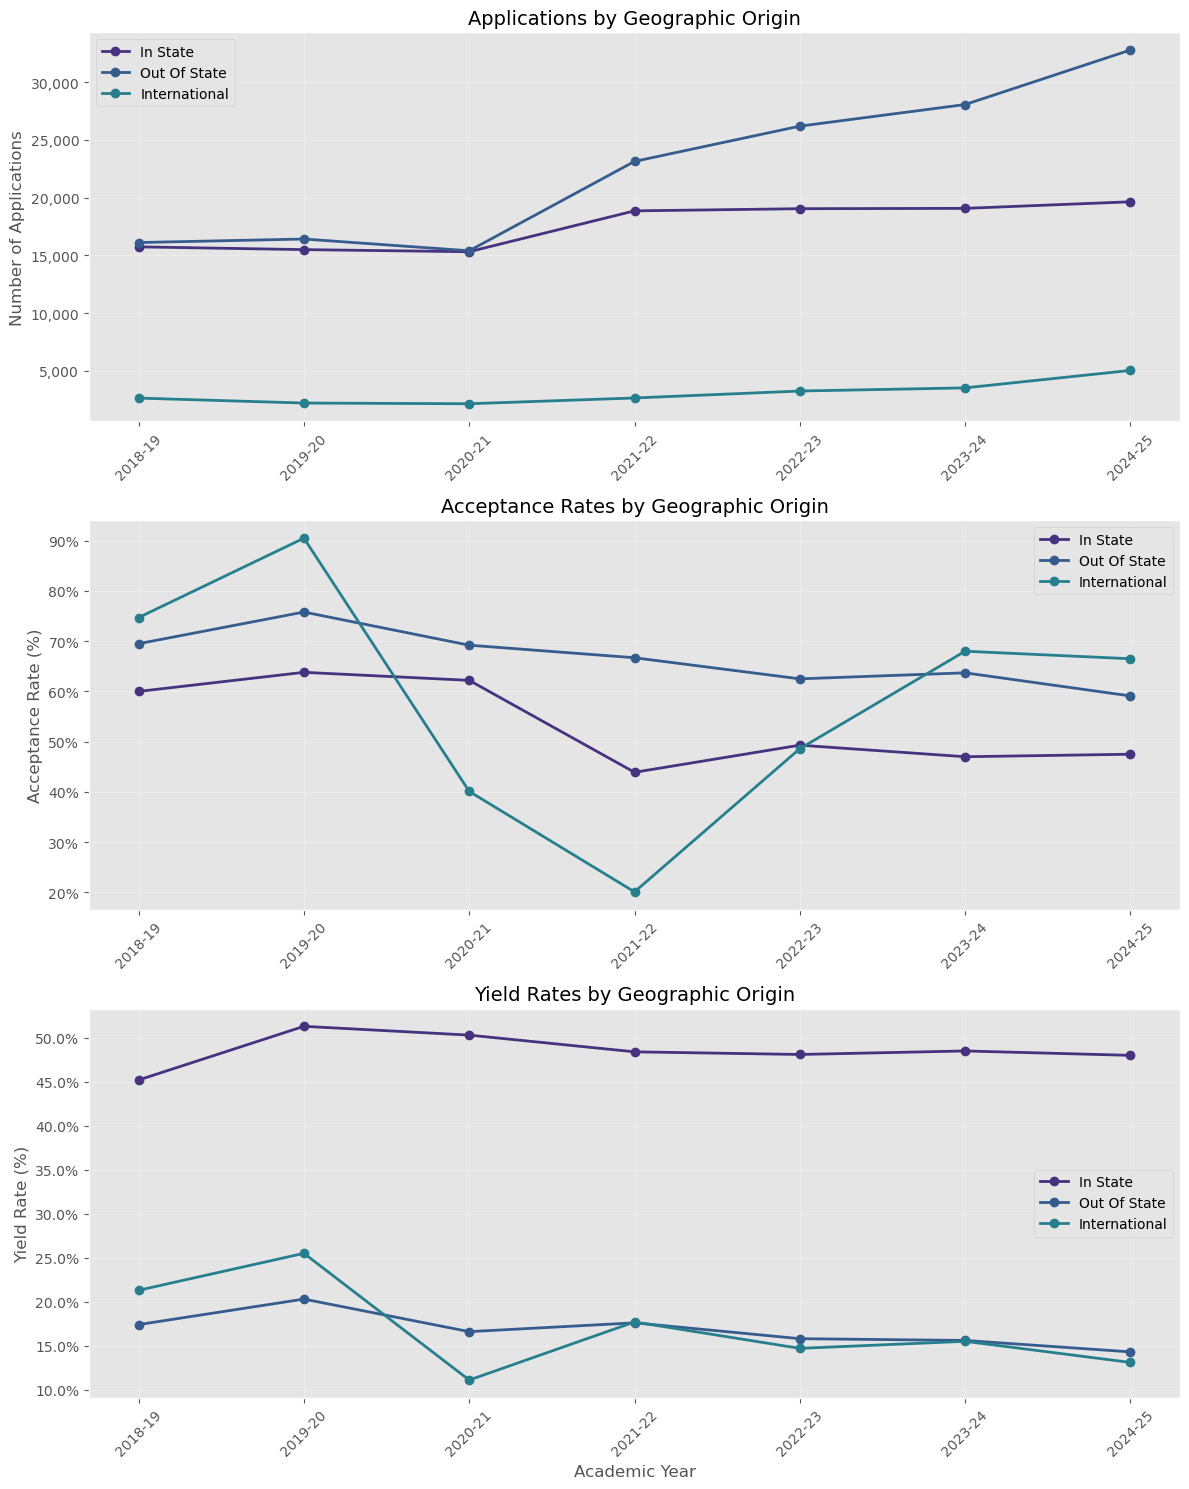

In [28]:
au.plot_geographic_trends(data)
plt.show()

In [29]:
geo_diversity = au.analyze_geographic_diversity(data)

print("Geographic Composition of Enrolled Students (%)")
display(HTML(geo_diversity['Enrolled']['composition'].to_html(float_format=lambda x: f'{x:.1f}%' if pd.notna(x) else '')))

print("\nChanges in Geographic Composition (2018-2025)")
display(HTML(geo_diversity['Enrolled']['changes'].to_html(float_format=lambda x: f'{x:.1f}' if pd.notna(x) else '')))

Geographic Composition of Enrolled Students (%)


,In-State (%),Out-of-State (%),International (%)
2018-19,64.3%,29.3%,6.3%
2019-20,62.6%,31.1%,6.3%
2020-21,72.0%,26.6%,1.4%
2021-22,58.7%,39.9%,1.4%
2022-23,61.6%,35.3%,3.2%
2023-24,57.9%,37.2%,4.9%
2024-25,58.3%,36.0%,5.7%



Changes in Geographic Composition (2018-2025)


,In-State (%),Out-of-State (%),International (%)
Change 2018-2025 (pp),-6.0,6.6,-0.6


## 8. Predictive Modeling

Let's build predictive models to forecast future admissions trends based on historical data.

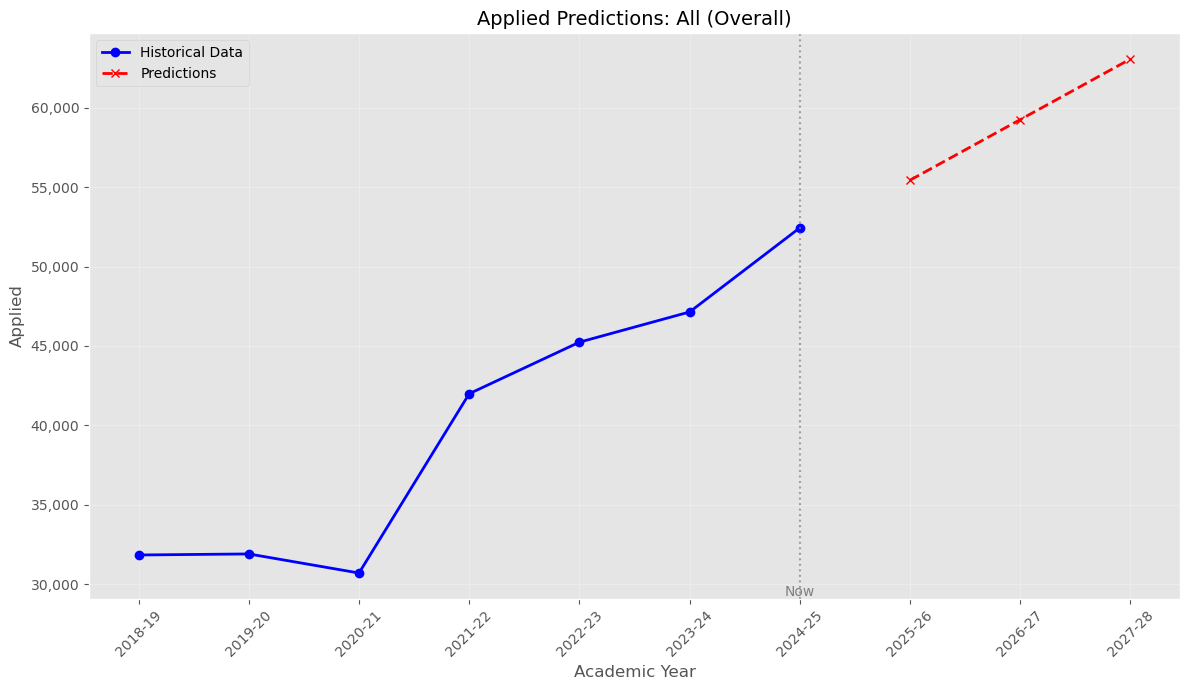

In [30]:
predictions = au.predict_future_trends(data, years_ahead=3)

au.plot_predictions(predictions, data, 'overall', 'all', 'Applied')
plt.show()

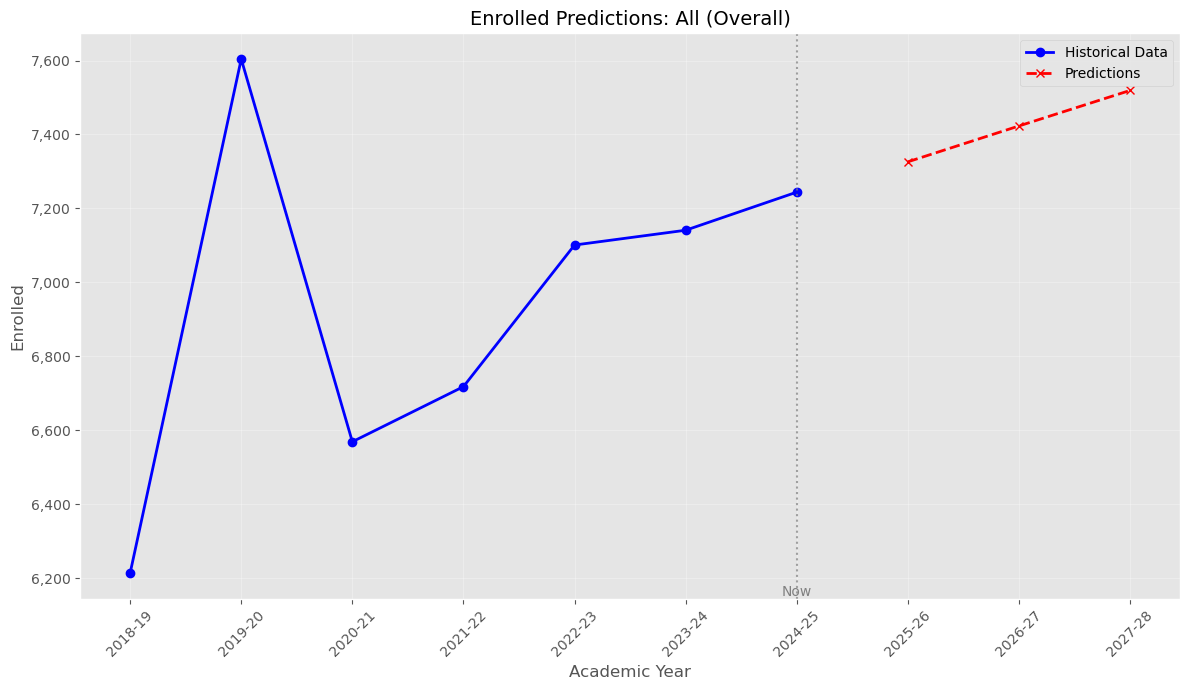

In [31]:
au.plot_predictions(predictions, data, 'overall', 'all', 'Enrolled')
plt.show()

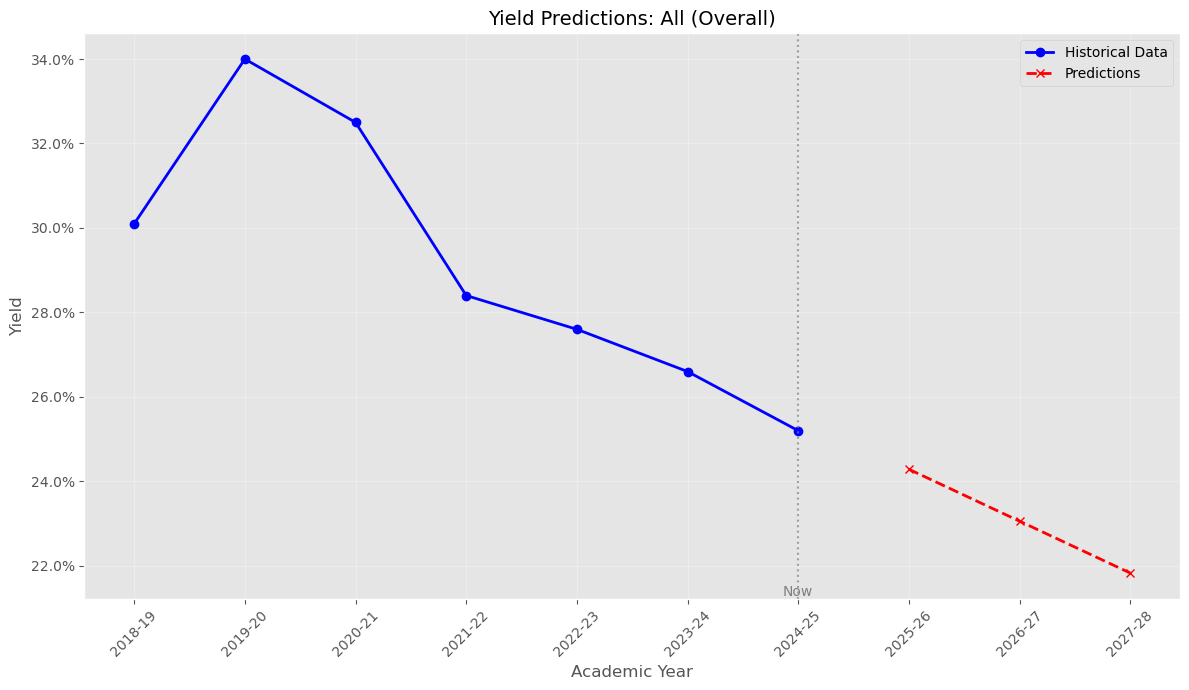

In [32]:
au.plot_predictions(predictions, data, 'overall', 'all', 'Yield')
plt.show()

In [33]:
model = au.build_predictive_model(data)

overall_pred = {
    'Applied': model['overall']['all']['Applied']['predictions'],
    'Offered': model['overall']['all']['Offered']['predictions'],
    'Enrolled': model['overall']['all']['Enrolled']['predictions'],
    'Offered Rate': model['overall']['all']['Offered Rate']['predictions'],
    'Yield': model['overall']['all']['Yield']['predictions']
}

pred_df = pd.DataFrame(overall_pred)

print("Predicted Admissions Metrics for Future Years:")
display(HTML(pred_df.to_html(float_format=lambda x: f'{int(x):,}' if x > 100 else f'{x:.1f}%')))

Predicted Admissions Metrics for Future Years:


,Applied,Offered,Enrolled,Offered Rate,Yield
2025-26,55432,29566,7326,51.5%,24.3%
2026-27,59244,30953,7423,49.2%,23.1%
2027-28,63057,32339,7519,46.8%,21.8%


## 9. Find Significant Trends

Let's identify statistically significant trends in the admissions data.

In [34]:
significant_trends = au.find_significant_trends(data)

def display_significant_trends(category, metric):
    results = []
    for group, metrics in significant_trends[category].items():
        if metric in metrics and metrics[metric]['is_significant']:
            direction = 'Increasing' if metrics[metric]['slope'] > 0 else 'Decreasing'
            results.append({
                'Group': group.replace('_', ' ').title(),
                'Direction': direction,
                'Slope': metrics[metric]['slope'],
                'R-squared': metrics[metric]['r_squared'],
                'P-value': metrics[metric]['p_value']
            })
    
    if results:
        return pd.DataFrame(results)
    else:
        return f"No significant {metric} trends found for {category}"

print("Significant Application Trends by Race/Ethnicity:")
result = display_significant_trends('race_ethnicity', 'Applied')
if isinstance(result, pd.DataFrame):
    display(HTML(result.to_html(index=False, float_format=lambda x: f'{x:.4f}' if pd.notna(x) else '')))
else:
    print(result)

Significant Application Trends by Race/Ethnicity:


Group,Direction,Slope,R-squared,P-value
Asian,Increasing,831.4643,0.9724,0.0000
Black,Increasing,453.7500,0.9135,0.0008
Hispanic,Increasing,465.1786,0.9331,0.0004
White,Increasing,1215.0000,0.7458,0.0122


In [35]:
print("Significant Yield Rate Trends:")
categories = ['race_ethnicity', 'residence', 'generation', 'gender']

for category in categories:
    print(f"\n{category.replace('_', ' ').title()}:")
    result = display_significant_trends(category, 'Yield')
    if isinstance(result, pd.DataFrame):
        display(HTML(result.to_html(index=False, float_format=lambda x: f'{x:.4f}' if pd.notna(x) else '')))
    else:
        print(result)

Significant Yield Rate Trends:

Race Ethnicity:


Group,Direction,Slope,R-squared,P-value
Black,Decreasing,-1.5286,0.7679,0.0097
White,Decreasing,-1.0179,0.5882,0.0442



Residence:


Group,Direction,Slope,R-squared,P-value
National,Decreasing,-1.1571,0.6534,0.0278
Out Of State,Decreasing,-0.6964,0.6179,0.0361



Generation:


Group,Direction,Slope,R-squared,P-value
First Gen,Decreasing,-2.0643,0.8043,0.0062
Non First Gen,Decreasing,-1.1107,0.6644,0.0255



Gender:


Group,Direction,Slope,R-squared,P-value
Female,Decreasing,-1.2929,0.6813,0.0222
Male,Decreasing,-1.1821,0.6693,0.0245


## 10. Comprehensive Dashboard

Let's create a comprehensive dashboard that provides an overview of key admissions metrics.

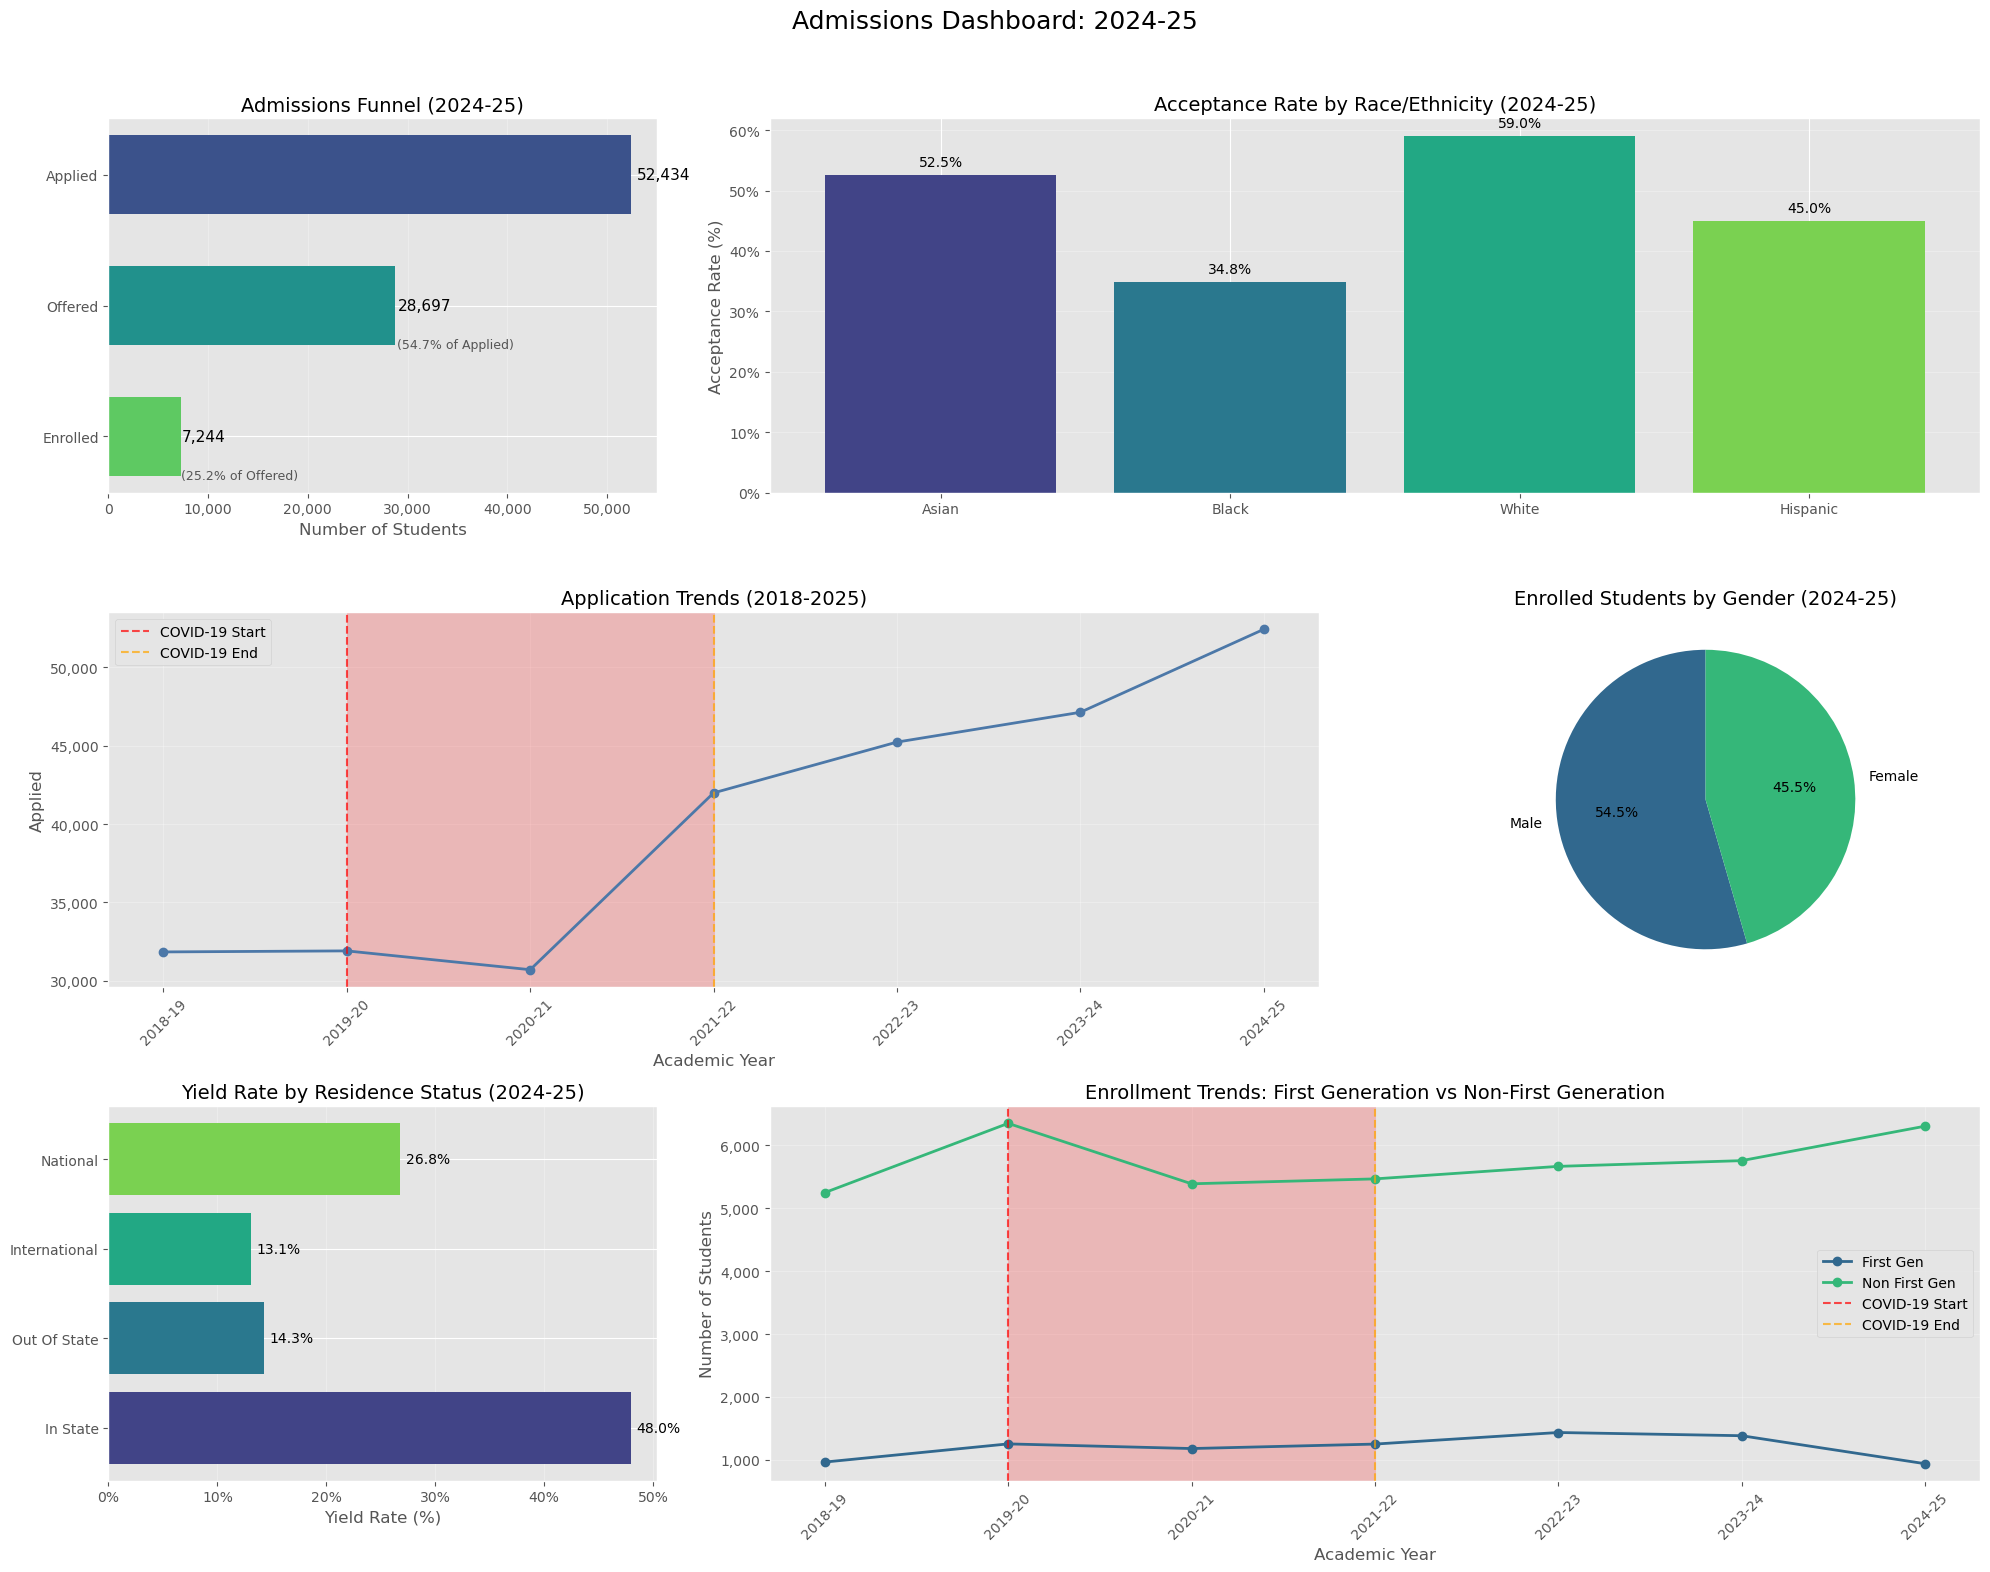

In [36]:
au.plot_dashboard(data, year='2024-25')
plt.show()